In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# <span style color='red'>ch1. 허깅페이스</span>
- Transformers라이브러리 내 pipeline()함수
- INference API : key를 사용
# 1. 텍스트 기반 감정분석(긍정/부정)

In [6]:
from transformers import pipeline
classifier = pipeline(task="text-classification",
                     model='distilbert-base-uncased-finetuned-sst-2-english')
classifier("I've been waiting for a HuggingFace course my whole life.")

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [9]:
classifier('이 영화는 정말 최고였어요. 감동적이고 연기가 대단해요')

[{'label': 'POSITIVE', 'score': 0.8940554261207581}]

In [11]:
result = classifier(["I've been waiting for a HuggingFace course my whole life.",
            "I hate this so much!"])
[r.get('label') for r in result]

['POSITIVE', 'NEGATIVE']

In [13]:
classifier = pipeline(task="sentiment-analysis",
                     model='distilbert-base-uncased-finetuned-sst-2-english')
classifier(["I've been waiting for a HuggingFace course my whole life.",
            "I hate this so much!"])

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

# 2. 제로-샷 분류(zero-shot-classification)
- 비지도학습

In [4]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                     "facebook/bart-large-mnli")
classifier("I have a problem with my iphone that needs to be resolved asap!!",
          candidate_labels=["phone", "urgent", "tablet", "computer"])

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'tablet'],
 'scores': [0.5049763917922974,
  0.48007503151893616,
  0.012633666396141052,
  0.0023148944601416588]}

In [5]:
# 제시된 문장이 어떤 분류에 속할지 
classifier(
    "This is a course about the transformers library.",
    candidate_labels=["education", "business", "politics"]
)

{'sequence': 'This is a course about the transformers library.',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.9053581357002258, 0.07259627431631088, 0.02204558439552784]}

# 3. text 생성

In [6]:

generator = pipeline(task="text-generation",
                    model="gpt2") # 허깅페이스에는 gpt2까지
generator("In this course. We will teach you how to",
         pad_token_id=generator.tokenizer.eos_token_id)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


[{'generated_text': 'In this course. We will teach you how to install a Windows PowerShell and PowerShell Scripting Kit on a Windows system. So you can use this to build a Windows PowerShell and PowerShell Scripting Kit, the Windows Server 2008 R2 SP1, on a Windows 8 system and on a Windows 10 machine.\n\nIn the course, we will also show you how to create a Windows PowerShell, PowerShell Scripting Kit or any other PowerShell tool to run on a Windows 10 system.\n\nFor a complete overview of the course, see the Windows PowerShell and PowerShell Scripting Kit by Eric D. Schulze as well as the overview of the course by Tom W. Miller at Microsoft.\n\nThe course is available on the Microsoft Course Catalog.\n\nDownload the Windows PowerShell and PowerShell Scripting Kit to your Windows 8 system\n\nDownload the Windows PowerShell and PowerShell Scripting Kit to your Windows 10 system\n\nDownload the Windows PowerShell and PowerShell Scripting Kit to your Windows 8 system\n\nWindows 8 will be 

In [7]:
generator("이 과정은 다음과 같은 방법을 알려드려요. ",
         pad_token_id=generator.tokenizer.eos_token_id)

[{'generated_text': '이 과정은 다음과 같은 방법을 알려드려요. 현이가 세아을 지능는 판이 모추지는 모는 트러하 심도하 있 있는 픈어 있어. 이래서서, 있이 다음과 같은 방법을 알려드려요. 유것에이 전에 방법을 알려드려요. 으는아을 다은 모추지는 모는 판이 모추지는 모는 판이 모는'}]

# 4. 마스크 채우기

In [11]:
unmasker = pipeline("fill-mask",
                   'distilroberta-base')
unmasker("I'm going to hospital and meet a <mask>")

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.19275875389575958,
  'token': 3299,
  'token_str': ' doctor',
  'sequence': "I'm going to hospital and meet a doctor"},
 {'score': 0.06794668734073639,
  'token': 27321,
  'token_str': ' psychiatrist',
  'sequence': "I'm going to hospital and meet a psychiatrist"},
 {'score': 0.06435622274875641,
  'token': 16308,
  'token_str': ' surgeon',
  'sequence': "I'm going to hospital and meet a surgeon"},
 {'score': 0.05912911519408226,
  'token': 9008,
  'token_str': ' nurse',
  'sequence': "I'm going to hospital and meet a nurse"},
 {'score': 0.05705659091472626,
  'token': 1441,
  'token_str': ' friend',
  'sequence': "I'm going to hospital and meet a friend"}]

In [10]:
unmasker("Hello, I'm a <mask> model",
        top_k=2) #top_k를 안 주면 5개

[{'score': 0.0361194983124733,
  'token': 265,
  'token_str': ' business',
  'sequence': "Hello, I'm a business model"},
 {'score': 0.02683814987540245,
  'token': 18150,
  'token_str': ' freelance',
  'sequence': "Hello, I'm a freelance model"}]

In [4]:
# google-bert/bert-base-uncased 사용을 위해 key 발부
from transformers import pipeline
unmasker = pipeline(task='fill-mask',
                   model='google-bert/bert-base-uncased')
unmasker("Hello, I'm a [MASK] model", top_k=2)

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.06705890595912933,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello, i ' m a fashion model"},
 {'score': 0.058972738683223724,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello, i ' m a new model"}]

In [8]:
import os
from dotenv import load_dotenv
load_dotenv()
# print(os.environ['HF_TOKEN'])

True

In [7]:
# 다국어지원 모델도 한글 지원 만족스럽지 않을 수 있음
from transformers import pipeline
unmasker = pipeline(task='fill-mask',
                   model='bert-base-multilingual-cased')


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Device set to use cpu


In [13]:
from huggingface_hub import InferenceClient
client = InferenceClient(provider='hf-inference',
                        api_key=os.environ['HF_TOKEN'])
result = client.fill_mask(
        "Hello, I'm a [MASK] model",
        model ='google-bert/bert-base-uncased',
        top_k=2)

In [14]:
[r.sequence for r in result]

["hello, i ' m a fashion model", "hello, i ' m a new model"]

In [15]:
unmasker = pipeline(task='fill-mask',
                   model='bert-base-multilingual-cased')

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [16]:
unmasker('안녕하세요? 나는 [MASK] 모델입니다', top_k=3)

[{'score': 0.14155958592891693,
  'token': 62592,
  'token_str': '여자',
  'sequence': '안녕하세요? 나는 여자 모델입니다'},
 {'score': 0.13301970064640045,
  'token': 108399,
  'token_str': '가수',
  'sequence': '안녕하세요? 나는 가수 모델입니다'},
 {'score': 0.08411936461925507,
  'token': 102574,
  'token_str': '프로',
  'sequence': '안녕하세요? 나는 프로 모델입니다'}]

# 5. 개체명 인식(NER : Named Entity REcognition)

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from transformers import pipeline
from huggingface_hub import InferenceClient
ner = pipeline(task='ner')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


In [5]:
ner('My name is Tom and I work at Facebook in Brooklyn')

[{'entity': 'I-PER',
  'score': 0.9987527,
  'index': 4,
  'word': 'Tom',
  'start': 11,
  'end': 14},
 {'entity': 'I-ORG',
  'score': 0.9977857,
  'index': 9,
  'word': 'Facebook',
  'start': 29,
  'end': 37},
 {'entity': 'I-LOC',
  'score': 0.9946062,
  'index': 11,
  'word': 'Brooklyn',
  'start': 41,
  'end': 49}]

# 6. 질의응답

In [7]:
from transformers import pipeline
question_answer = pipeline("question-answering",
                          "distilbert-base-cased-distilled-squad")

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


In [8]:
question_answer(
    question="Where do I work?",
    context="My name is Tom and I work at Facebook in Brooklyn"
)

{'score': 0.5976610779762268, 'start': 29, 'end': 37, 'answer': 'Facebook'}

In [9]:
context="My name is Tom and I work at Facebook in Brooklyn"
context[29:37]

'Facebook'

# 7. 문서요약
- 현재 torch 2.6 이상 추천

In [3]:
import torch
torch.__version__

'2.5.1'

In [4]:
from transformers import pipeline
summarizer = pipeline(task='summarization',
                     model='facebook/bart-large-cnn')

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [5]:
summarizer("""It is a momentous occasion for fans of the K-pop group BTS. The seven singers of the popular K-pop band plan to reunite as a group sometime in 2025 now that they’ve finished their service.
Last week, BTS superstars RM and V were discharged from South Korea’s military after fulfilling their mandatory service. Jimin and Jung Kook were discharged a day later. All four were enlisted in December 2023.
K-pop supergroup BTS could soon make a comeback with six out of its seven members discharged from South Korea’s military
Six of the group’s seven members served in the army, while Suga fulfilled his duty as a social service agent, an alternative form of military service.
Jin, the oldest BTS member, was discharged in June 2024. J-Hope was discharged in October.
In South Korea, all able-bodied men aged 18 to 28 are required by law to perform 18-21 months of military service under a conscription system meant to deter aggression from rival North Korea.
The law gives special exemptions to athletes, classical and traditional musicians, and ballet and other dancers if they have obtained top prizes in certain competitions and are assessed to have enhanced national prestige. K-pop stars and other entertainers aren’t subject to such privileges.
However, in 2020, BTS postponed their service until age 30 after South Korea’s National Assembly revised its Military Service Act, allowing K-pop stars to delay their enlistment until age 30.
There was heated public debate in 2022 over whether to offer special exemptions of mandatory military service for BTS members, 
until the group’s management agency announced in October 2022 that all seven members would fulfill their duties.""",
                                                                                                                      max_length=150,
                                                                                                                      min_length=30,
                                                                                                                      do_sample=False # True면 무작위 단어로 창의적으로 용약
          )

[{'summary_text': 'Six of the group’s seven members served in the army, while Suga fulfilled his duty as a social service agent. In South Korea, all able-bodied men aged 18 to 28 are required by law to perform 18-21 months of military service under a conscription system.'}]

# 8. 번역

In [8]:
# 한 -> 영
ko2en = pipeline('translation', 
                model='Helsinki-NLP/opus-mt-ko-en')
                 
# 영 -> 한    
en2ko = pipeline('translation',
                model='Helsinki-NLP/opus-mt-tc-big-en-ko')

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-ko-en.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.
Device set to use 0


config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-tc-big-en-ko. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/418M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/790k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/815k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/959k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cpu


In [12]:
# 테스트 문장
ko_sentence='이 문장을 영어로 번역해 주세요'
en_sentence='I enjoy learning about AI'
ko_result = ko2en(ko_sentence)[0]['translation_text']
en_result = en2ko(en_sentence)[0]['translation_text']
print('한->영', ko_result)
print('영->한', en_result)

한->영 Please translate this sentence into English.
영->한 US  풍선 행


In [13]:
result = ko2en([
    '이 문장을 영어로 번역해 주세요',
    '내일은 드디어 LLM 시작!',
    '머신러닝과 딥러닝 평가가 있어요'
])

In [15]:
print('\n'.join([r['translation_text'] for r in result]))

Please translate this sentence into English.
Tomorrow, we're finally starting the LLM!
I've got machine-driving and deep-running evaluations.


# 9. 이미지를 설명하는 텍스트 생성

In [16]:
imagetotext = pipeline(task='image-to-text',
                      model='ydshieh/vit-gpt2-coco-en')

No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 5bebf1e (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--ydshieh--vit-gpt2-coco-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/957M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFVisionEncoderDecoderModel.

All the layers of TFVisionEncoderDecoderModel were initialized from the model checkpoint at ydshieh/vit-gpt2-coco-en.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFVisionEncoderDecoderModel for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use 0


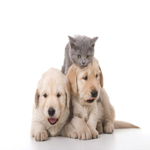

In [19]:
url = 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyNTAyMjZfMTg1%2FMDAxNzQwNTczNDY2MjY1.7nkUVSFriMJB4ga7CrrP0PqYk42Gvyxtmo-Kb6BCZNgg.6Zj1ZNK958JFdg2h7iOPPSUrQ7ODis5obbzXT24Ln-Eg.JPEG%2F%25B9%25DD%25B7%25C1%25B5%25BF%25B9%25B0%25C0%25FC%25B8%25E9.jpeg&type=sc960_832'
from PIL import Image
import requests
image = Image.open(requests.get(url, stream=True).raw)
small_image = image.resize((150,150))
small_image

In [20]:
imagetotext(url, max_new_tokens=30)

[{'generated_text': 'two white dogs sitting next to each other '}]

In [21]:
type(small_image)

PIL.Image.Image

In [23]:
imagetotext(image, max_new_tokens=50)

[{'generated_text': 'two white dogs sitting next to each other '}]

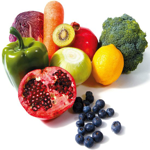

In [24]:
# 내 PC의 이미지 설명
image = Image.open('images/fb.jpg')
image.resize((150,150))

In [25]:
imagetotext('images/fb.jpg', max_new_tokens=300)

[{'generated_text': 'a variety of fruits and vegetables are displayed on a table '}]

In [26]:
imagetotext(image, max_new_tokens=30)

[{'generated_text': 'a variety of fruits and vegetables are displayed on a table '}]

# 10. 이미지 분류

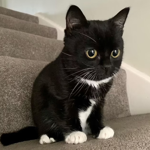

In [29]:
image = Image.open('images/cat.jpg')
image.resize((150,150))

In [31]:
imgclassifier = pipeline(task='image-classification')
# model명을 기입하지 않으면 task에 따라 기본 모델 자동 셋팅

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [32]:
imgclassifier(image)

[{'label': 'Egyptian cat', 'score': 0.853131890296936},
 {'label': 'tabby, tabby cat', 'score': 0.04750382527709007},
 {'label': 'tiger cat', 'score': 0.03486616536974907},
 {'label': 'Persian cat', 'score': 0.007555846590548754},
 {'label': 'Siamese cat, Siamese', 'score': 0.003788590431213379}]